   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

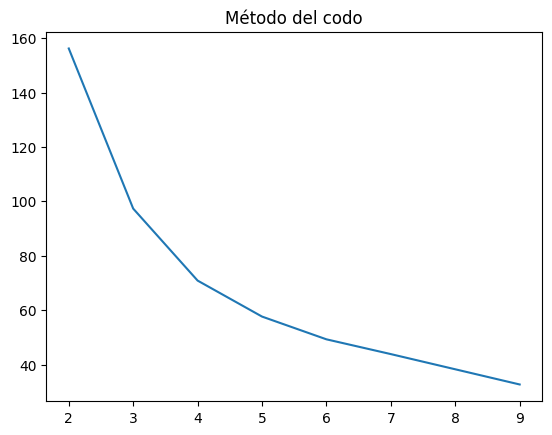

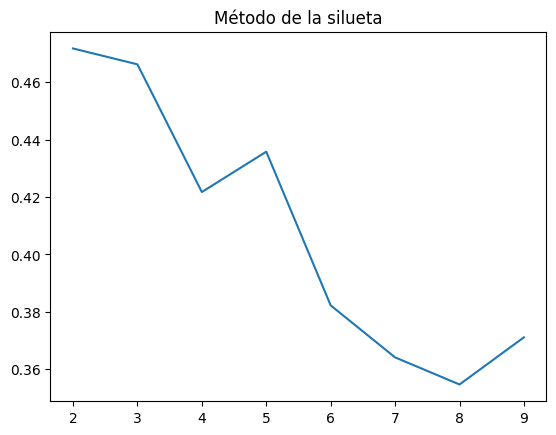

[1 0 4 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0
 0 0 1 1 0 1 0 0 1 1 1 1 2 4 1 1 1 1 1 1 4 1 5 5 4 0 5 5 5 0 5 0 5 5 0 0 0
 3 3 0 3 5 5 3 5 5 0 3 5 5 3 3 5 5 3 5 5 3 5 3 5 5 5 5 5 5 3 5 5 5 5 5 3 3
 5 3 3 5 3 3 5 5 5 3 3 5 0 3 5 5 3 5 5 0 4 4 4 4 4 5 4 1 0 0 0 0 0 4 0 1 4
 2 2 2 2 4 2 4 4 2 4 2 2 4 1 4 4 2 1 2 2 2 2 4 2 2 1 4 2 2 2]

[[ 0.31877966 -0.36937859]
 [ 1.19707967  0.38883139]
 [ 0.62991538  2.02559578]
 [-1.60795419 -0.88057441]
 [-0.27234164  0.60245893]
 [-0.80563098 -0.92816354]]

49.26668870448699
0.38225952330492385


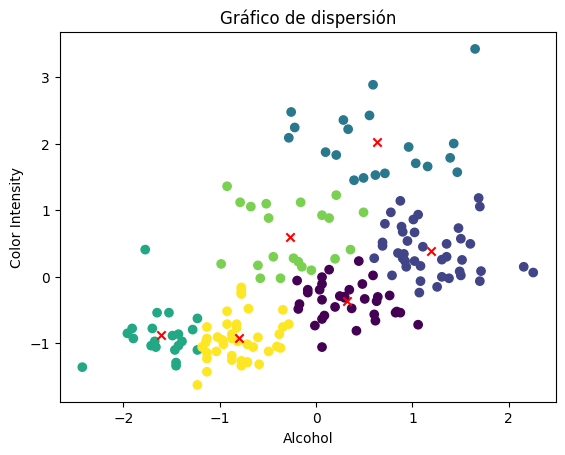


[0]


c:\Users\FUNDAMENTOS IA\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [30]:
import pandas as pd
#Importar seaborn, para el gráfico de dispersión
import seaborn as sns
#Importar KMeans para el algoritmo de agrupamiento
from sklearn.cluster import KMeans
#importar matplotlib para graficar
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
#importar StandardScaler para normalizar los datos
from sklearn.preprocessing import StandardScaler
#Importar numpy
import numpy as np
#Leer archivo
datos = pd.read_csv("wine_cluster.csv")
print(datos.head())
print(datos.describe())
# sns.pairplot(datos)
#caracteristicas 
x= datos[['Alcohol', 'Color_Intensity']]

#Normalizar los datos
x = (x-x.mean())/x.std()
# En esta linea se restan los datos por el promedio y luego se divide por la desviación estandar

#Determinar la inercia
k_valores = range(2, 10)
inercias = []
siluetas = []
for k in k_valores:
    #Crear el modelo
    modelo=KMeans(k, random_state=123)
    #Ajustar el modelo
    modelo.fit(x)
    #Agregar la inercia a la lista
    inercias.append(modelo.inertia_)
    #Agregar la silueta a la lista
    silueta= silhouette_score(x, modelo.labels_)
    siluetas.append(silueta)

#Graficar el codo 
plt.plot(k_valores, inercias)
plt.title("Método del codo")
plt.show()
#Graficar la silueta
plt.plot(k_valores, siluetas)
plt.title("Método de la silueta")
plt.show()

#Crear modelo 
modelo = KMeans(6, random_state=123)
#Ajustar modelo
modelo.fit(x)
#Agregar etiquetas
etiquetas = modelo.labels_
centroide = modelo.cluster_centers_
print(etiquetas)
print(f"\n{centroide}")
print(f"\n{modelo.inertia_}")
silueta= silhouette_score(x, etiquetas)
print(f"{silueta}")

#Grafico de dispersión
plt.scatter(x['Alcohol'], x['Color_Intensity'], c=etiquetas, cmap='viridis')
#Graficar los centroides
plt.scatter(centroide[:,0], centroide[:,1], marker='x', color='red')
plt.title("Gráfico de dispersión")
plt.xlabel("Alcohol")
plt.ylabel("Color Intensity")
plt.show()

#Nueva Dispersión 
X=np.array([[14,5]])
X=(X-X.mean())/X.std()
prediccion=modelo.predict(X)
print(f"\n{prediccion}")